# Corelation Between Tiktok and Instagram

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load datasets

tiktok = pd.read_csv('data/social media influencers - tiktok.csv')
ins = pd.read_csv('data/social media influencers - youtube.csv')


In [3]:
# preview

tiktok.head()


,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K


In [4]:
# preview

ins.head()


,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [5]:
#  define functions for datasets processing

def convert_units(x):
    """
    This function converts a string with a suffix 'M' or 'K' to a float,
    multiplying by 1 million or 1000, respectively.
    """
    if isinstance(x, str):
        if 'M' in x:
            return float(x.replace('M', '')) * 1000000
        elif 'K' in x:
            return float(x.replace('K', '')) * 1000
    return x


def df_transform(df):
    """
    This function converts an object dataframe with "M" or "K' to a numeric
    dataframe
    """
    df['Subscribers'] = df['Subscribers'].apply(convert_units)
    df['Avg_Views'] = df['Avg_Views'].apply(convert_units)
    df['Avg_Likes'] = df['Avg_Likes'].apply(convert_units)
    df['Avg_Comments'] = df['Avg_Comments'].apply(convert_units)
    df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
    df['Avg_Views'] = pd.to_numeric(df['Avg_Views'], errors='coerce')
    df['Avg_Likes'] = pd.to_numeric(df['Avg_Likes'], errors='coerce')
    df['Avg_Comments'] = pd.to_numeric(df['Avg_Comments'], errors='coerce')
    return df


In [6]:
# Tiktok dataframe selection, rename, cleaning and processing

tiktok_cor = tiktok.iloc[:, [2, 3, 4, 5,]]
tiktok_cor = tiktok_cor.rename(columns={'Subscribers count': 'Subscribers',
                               'Views avg.': 'Avg_Views', 'Likes avg': 'Avg_Likes', 'Comments avg.': 'Avg_Comments'})
tiktok_cor = tiktok_cor.dropna()
tiktok_cor = df_transform(tiktok_cor)
tiktok_cor


,Subscribers,Avg_Views,Avg_Likes,Avg_Comments
0,221700.0,26000000.0,2800000.0,29400.0
1,22200000.0,25400000.0,5000000.0,36700.0
2,2100000.0,20700000.0,3500000.0,38800.0
3,135400000.0,18700000.0,2600000.0,54700.0
4,11400000.0,24800000.0,2600000.0,32700.0
...,...,...,...,...
995,4000000.0,2200000.0,351300.0,957.0
996,5100000.0,2500000.0,340400.0,901.0
997,5800000.0,1000000.0,206800.0,2000.0
998,1200000.0,1900000.0,300800.0,904.0


In [7]:
# Instagram dataframe selection, rename, cleaning and processing

ins_cor = ins.iloc[:, [3, 5, 6, 7]]
ins_cor = ins_cor.rename(columns={
                         'avg views': 'Avg_Views', 'avg likes': 'Avg_Likes', 'avg comments': 'Avg_Comments'})
ins_cor = ins_cor.dropna()
ins_cor = df_transform(ins_cor)
ins_cor


,Subscribers,Avg_Views,Avg_Likes,Avg_Comments
0,212100000.0,323700.0,9800.0,290.0
2,130400000.0,23600.0,314.0,21.0
3,111400000.0,1400000.0,80800.0,4600.0
4,92500000.0,30600000.0,1700000.0,67700.0
7,86900000.0,76600.0,2800.0,163.0
...,...,...,...,...
995,9200000.0,1400000.0,110100.0,2500.0
996,9200000.0,243800.0,30700.0,636.0
997,9200000.0,296000.0,10200.0,874.0
998,9200000.0,15200.0,854.0,58.0


Text(0.5, 1.0, 'Tiktok Correlations')

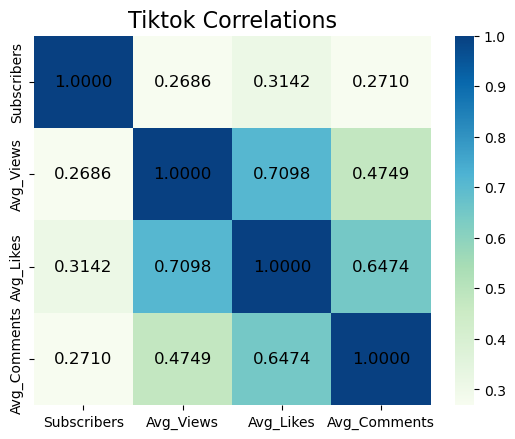

In [8]:
# Tiktok Correlation Heatmaps
tikmat = tiktok_cor.corr()
sns.heatmap(tikmat, cmap="GnBu", annot=True, fmt=".4f",
            annot_kws={"size": 12, "color": "black"}).set_title('Tiktok Correlations', fontsize=16)



Text(0.5, 1.0, 'Instagram Correlations')

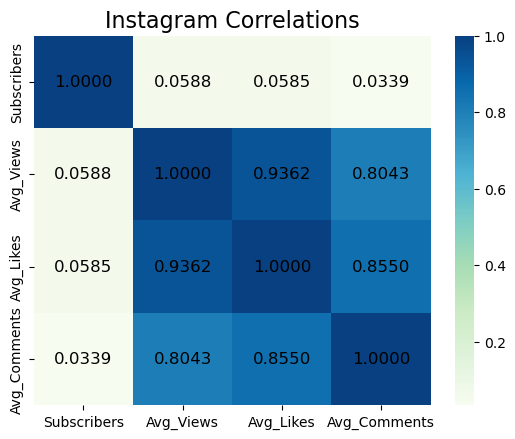

In [9]:
# Instagram Correlation Heatmaps
insmat = ins_cor.corr()
sns.heatmap(insmat, cmap="GnBu", annot=True, fmt=".4f", annot_kws={
            "size": 12, "color": "black"}).set_title('Instagram Correlations', fontsize=16)


Text(0.5, 1.05, 'Correlation between Average Views and Average Likes on TikTok')

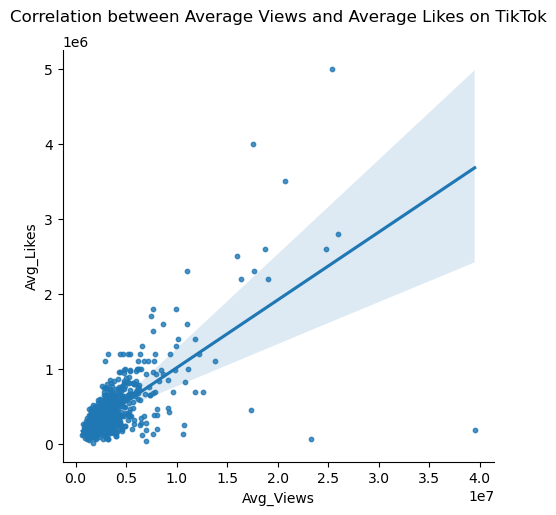

In [10]:
# Views vs Likes 
sns.lmplot(x="Avg_Views", y="Avg_Likes", data=tiktok_cor, scatter_kws={'s': 10})
plt.gca().set_title('Correlation between Average Views and Average Likes on TikTok', y=1.05)

Text(0.5, 1.05, 'Correlation between Average Views and Average Likes on Instagram')

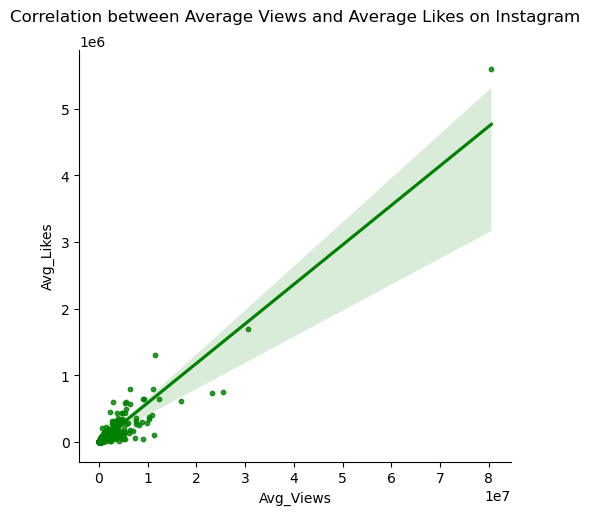

In [11]:
sns.lmplot(x="Avg_Views", y="Avg_Likes", data=ins_cor, scatter_kws={'color': 'green','s': 10}, line_kws={'color': 'green'})
plt.gca().set_title('Correlation between Average Views and Average Likes on Instagram', y=1.05)

Text(0.5, 1.05, 'Correlation between Average Views and Average Comments on TikTok')

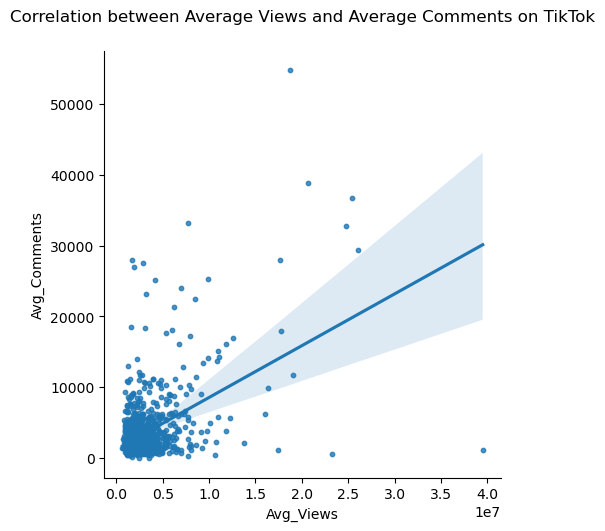

In [12]:
# Views vs Comments 
sns.lmplot(x="Avg_Views", y="Avg_Comments", data=tiktok_cor, scatter_kws={'s': 10})
plt.gca().set_title('Correlation between Average Views and Average Comments on TikTok', y=1.05)

Text(0.5, 1.05, 'Correlation between Average Views and Average Comments on Instagram')

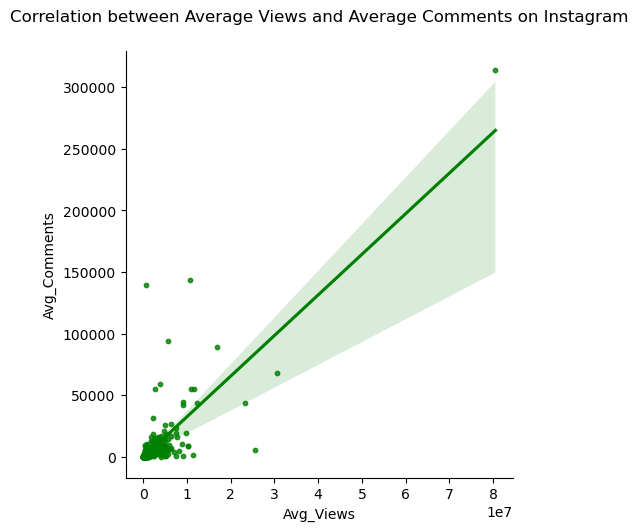

In [13]:
sns.lmplot(x="Avg_Views", y="Avg_Comments", data=ins_cor, scatter_kws={'color': 'green','s': 10}, line_kws={'color': 'green'})
plt.gca().set_title('Correlation between Average Views and Average Comments on Instagram', y=1.05)

Text(0.5, 1.05, 'Correlation between Average Likes and Average Comments on TikTok')

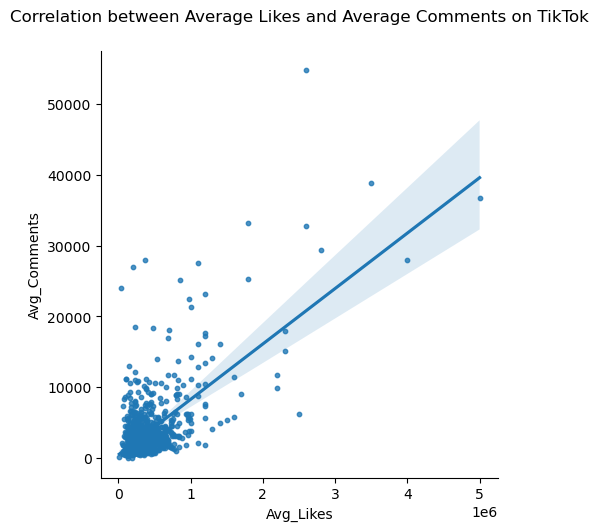

In [14]:
# Views vs Comments 
sns.lmplot(x="Avg_Likes", y="Avg_Comments", data=tiktok_cor, scatter_kws={'s': 10})
plt.gca().set_title('Correlation between Average Likes and Average Comments on TikTok', y=1.05)

Text(0.5, 1.05, 'Correlation between Average Likes and Average Comments on Instagram')

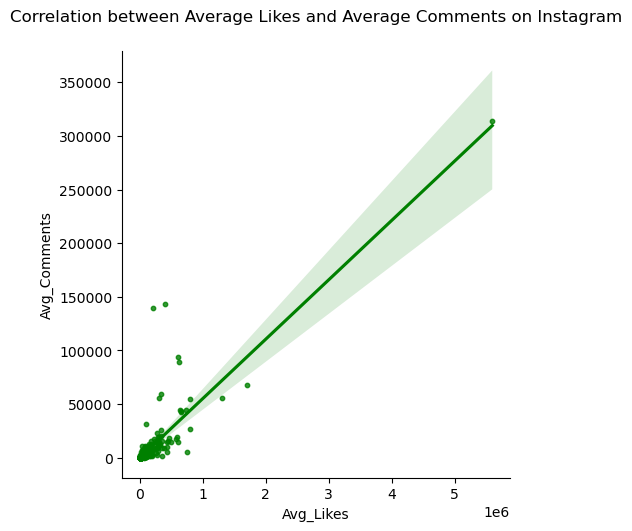

In [15]:
sns.lmplot(x="Avg_Likes", y="Avg_Comments", data=ins_cor, scatter_kws={'color': 'green','s': 10}, line_kws={'color': 'green'})
plt.gca().set_title('Correlation between Average Likes and Average Comments on Instagram', y=1.05)